In [ ]:
# Step1 - import the libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [4]:
data = pd.read_csv('Wine_white.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
data.shape

(4898, 12)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
print(data.groupby('quality').size())

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


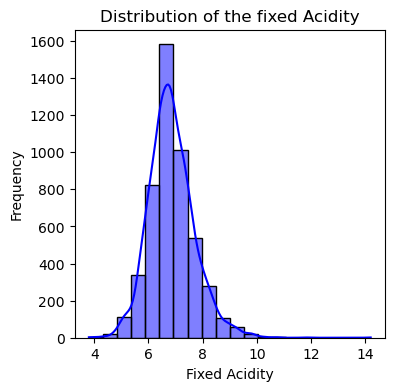

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (4,4))
sns.histplot(x = 'fixed acidity',bins = 20, kde = True,data = data, color = 'b')
plt.title("Distribution of the fixed Acidity")
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()


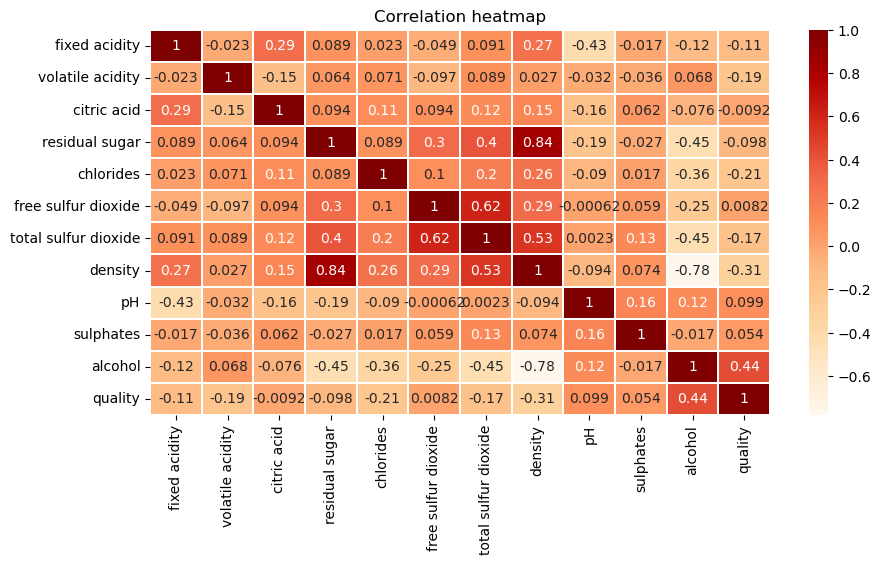

In [16]:
correlation_matrix = data.corr()

plt.figure(figsize =(10,5))
sns.heatmap(correlation_matrix,annot = True, cmap = 'OrRd',linewidth = 0.3)
plt.title('Correlation heatmap')
plt.show()

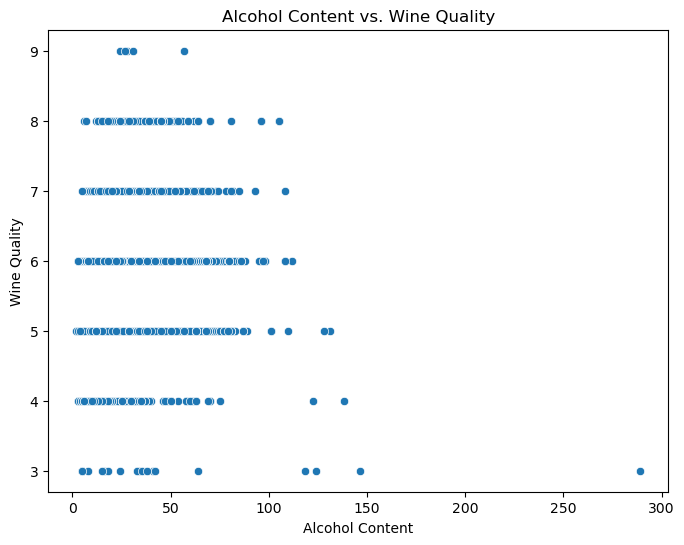

In [17]:
# Scatter plot: Alcohol vs. Quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='free sulfur dioxide', y='quality')
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.show()

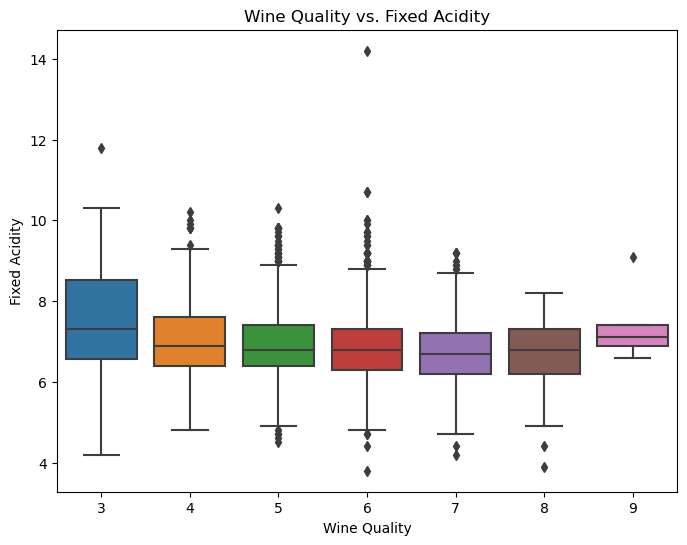

In [19]:
# Box plot Wine quality vs. Fixed Acidity
plt.figure(figsize=(8, 6))
sns.boxplot(data = data,x='quality', y='fixed acidity')
plt.title('Wine Quality vs. Fixed Acidity')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.show()



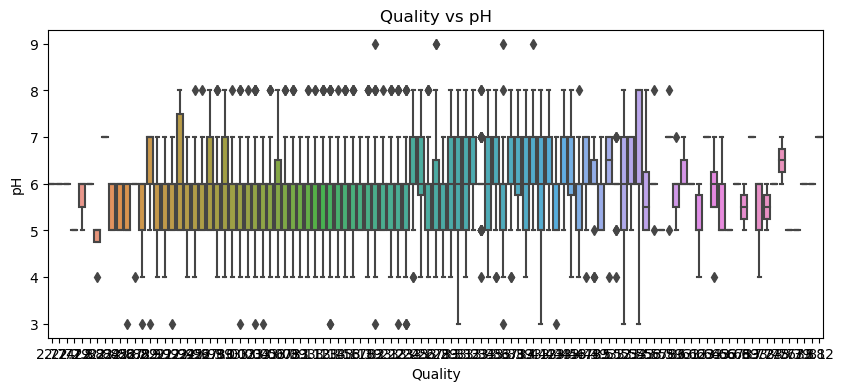

In [27]:
plt.figure(figsize = (10,4))
sns.boxplot(data = data,x ='pH',y = 'quality')
plt.title("Quality vs pH")
plt.xlabel('Quality')
plt.ylabel("pH")
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression

from sklearn import model_selection

array = dataset.values
X = array[:,0:12]
Y = array[:,12]

seed = 8
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC()))

result = []
names = []
scoring = 'accuracy'
test_size = 0.33
seed = 0

for name,model in models:
    kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size,random_state = seed)
    cv_result = model_selection.cross_val_score(model,X,Y,cv = kfold,scoring = scoring)
    result.append(cv_result)
    names.append(name)
    msg = "%s: %f(%f)" % (name,cv_result.mean()*100,cv_result.std())
    print(msg)

C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LR: 69.938157(0.009095)
LDA: 51.997526(0.005202)


C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

KNN: 51.001855(0.011838)
CART: 100.000000(0.000000)
NB: 99.950526(0.000989)
SVM: 44.693878(0.012325)


In [48]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action = 'ignore',category = FutureWarning)


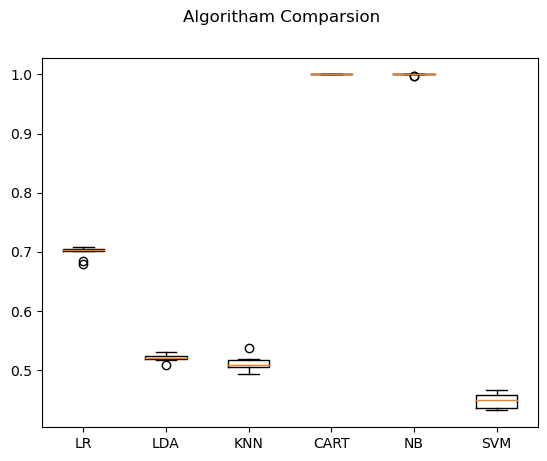

In [49]:
fig = plt.figure()
fig.suptitle('Algoritham Comparsion')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with scaling and Logistic Regression
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("LR", LogisticRegression())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("LDA",LinearDiscriminantAnalysis())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("KNN",KNeighborsClassifier())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("CART",DecisionTreeClassifier())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("NB",GaussianNB())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("SVM",SVC())])
result = []
# result = []
names = []
scoring = 'accuracy'
test_size = 0.44
seed = 0

for name,model in models:
    kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size,random_state = seed)
    cv_result = model_selection.cross_val_score(model,X,Y,cv = kfold,scoring = scoring)
    result.append(cv_result)
    names.append(name)
    msg = "%s: %f(%f)" % (name,cv_result.mean()*100,cv_result.std())
    print(msg)

C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LR: 69.373840(0.018898)
LDA: 52.286642(0.006202)
KNN: 50.092764(0.007650)
CART: 99.976809(0.000696)
NB: 99.958256(0.000841)
SVM: 45.037106(0.008793)


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection


# Assuming you've defined X, Y, test_size, and seed

Scaler = StandardScaler().fit(X)
rescaledX = Scaler.transform(X)
neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid = dict(n_neighbors=neighbors)  # Use the correct parameter name

model = KNeighborsClassifier()
kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.911456 using {'n_neighbors': 1}


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

Scaler = StandardScaler().fit(X)
rescaledX = Scaler.transform(X)
c_values = [0.1,0.3,0.5,6.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernal_values = ['linear','pdy','rbf','signoid']
param_grid = dict(C = c_values,kernal = kernal_values)
model = SVC()
kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size,random_state = seed)
grid = GridSearchCV(estimator = model,param_grid = param_grid,scoring = scoring,cv = kfold)
# grid_result = grid.fit(rescaledX,Y)
print('Best: %f using %s'%(grid_result.best_score_,grid_result.best_params_))

Best: 0.911456 using {'n_neighbors': 1}


AB : 0.450371(0.008793) 
GBM : 0.450371(0.008793) 
RR : 0.450371(0.008793) 
ET : 0.450371(0.008793) 


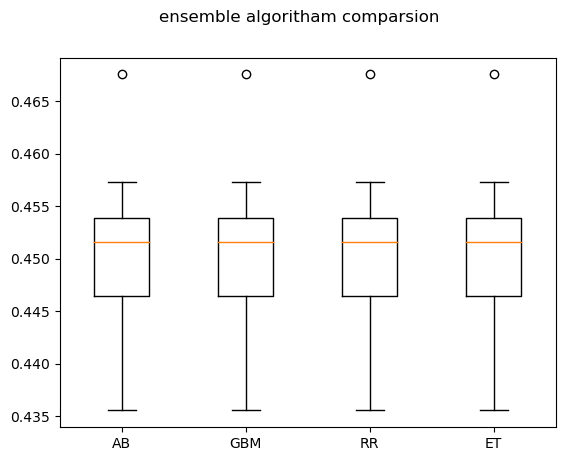

In [57]:
ensembles = []
ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RR',RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))
result = []
names = []
for name, modle in ensembles:
    kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X,Y,cv = kfold,scoring = scoring)
    result.append(cv_result)
    names.append(name)
    msg = "%s : %f(%f) " %(name,cv_result.mean(),cv_result.std())
    print(msg)

fig = plt.figure()
fig.suptitle('ensemble algoritham comparsion')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

In [58]:
scaler = StandardScaler().fit(X);
rescaledx = scaler.transform(X)
model = LinearDiscriminantAnalysis()
model.fit(rescaledX,Y)


LinearDiscriminantAnalysis()

In [60]:
rescaledvalidationX = Scaler.transform(X)
predictions =  model.predict(rescaledvalidationX)


In [62]:
print(accuracy_score(Y,predictions))

1.0


In [63]:
print(confusion_matrix(Y,predictions))


[[  20    0    0    0    0    0    0]
 [   0  163    0    0    0    0    0]
 [   0    0 1457    0    0    0    0]
 [   0    0    0 2198    0    0    0]
 [   0    0    0    0  880    0    0]
 [   0    0    0    0    0  175    0]
 [   0    0    0    0    0    0    5]]


In [65]:
print(classification_report(Y,predictions))


              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00       163
         5.0       1.00      1.00      1.00      1457
         6.0       1.00      1.00      1.00      2198
         7.0       1.00      1.00      1.00       880
         8.0       1.00      1.00      1.00       175
         9.0       1.00      1.00      1.00         5

    accuracy                           1.00      4898
   macro avg       1.00      1.00      1.00      4898
weighted avg       1.00      1.00      1.00      4898

